<img align="right" src="images/tf-small.png" width="90"/>
<img align="right" src="images/etcbc.png" width="100"/>

# MiMi
## A Deterministic Coreference Resolver for Biblical Hebrew

MiMi is a deterministic - meaning 'rule driven' - coreference resolver for Biblical Hebrew. MiMi is the concatenation of Mi Mi in Biblical Hebrew, which means 'Who? Who?' MiMi is used as a tool to identify and analyse participants or entities in a text. MiMi has been built with the aid of the insights that have been gained in the [annotation](https://github.com/cmerwich/participant-analysis/tree/master/annotation) and [iaa](https://github.com/cmerwich/participant-analysis/tree/master/iaa) processes. 

MiMi has two phases: mention detection and coreference resolution. The aim was to build a near perfect mention detection phase and a modular coreference resolver that can be enhanced in future research. Most coreference resolvers, machine learning models or deterministic models, remove singletons in an additional third stage. We have chosen to retain singletons, since they are also of importance for participant analysis in Biblical Hebrew. MiMi can be used for any Hebrew Bible book, regardless the genre. 

#### Phase One: Mention Detection
In the first phase the input text is tokenised and parsed for mentions. The API of [Text-Fabric](https://annotation.github.io/text-fabric/) is used to process the data of the BHSA [Hebrew Bible Database](https://etcbc.github.io/bhsa/) which contains the text of the Hebrew Bible augmented with linguistic annotations as compiled by the Eep Talstra Centre for Bible and Computer [ETCBC](http://etcbc.nl). The mention parser takes as input [phrase atoms](https://etcbc.github.io/bhsa/features/otype/), for which the ETCBC has already determined the boundaries. That makes the parsing of mentions much easier. For both the mention enrichment and the coreference resolution phase many BHSA features are used. The documentation can be found under the aforementioned phrase atom hyperlink. The mention parsing is done with a Python implemention of the lex and yac tools called [SLY](https://sly.readthedocs.io/en/latest/index.html). 

#### Phase Two: Coreference Resolution
In the second phase the mentions are stored as a coreference list of singleton sets. The coreference singleton sets are merged in a sequence of eight sieves. MiMi resolves in order: 1P and 2P pronouns, Vocatives, String Match, Named Entities, Appositions, Fronted Elements, Subject - Predicates and 3P pronouns. MiMi resolves coreference generally 'easy first', meaning that the most easy resolution choices are made first, based on the availability of BHSA features and the most explicit mention categories that have the most occurrences in the database.
1. 1st and 2nd Person Pronouns. MiMi's first sieve merges both 1P and 2P mentions within the same ETCBC paragraph of a chapter. As long as the mention is not a verbal phrase (VP's will be resolved in the Subject - Predicate sieve), the sieve takes either the first 1P or 2P mention of the chapter and merges them with all ensuing same grammatical number mentions within the same paragraph. The concept of paragraph is in need of further explanation here. The sieve makes use of the TF/BHSA feature [`pargr`](https://etcbc.github.io/bhsa/features/pargr/) The ETCBC defines the feature as: a paragraph is started with the changing of the actual set of actors, through the introduction of an explicit NP-subject, typically by a WayX or WXQt clause. *WayX*: a wayyiqtol clause in which the predicate is followed by an explicit subject (X). *WXQt*: a weqatal clause in which an explicit subject (X) is positioned between the Waw and the predicate. The introduction can (1) add an actor to the (empty) set; (2) reverse the roles in the set of actors: parallel connection; (3) suspend other actors in the set. 
2. Vocatives. MiMi's second sieve searches for NP mentions with a vocative function and merges them with mentions with a 2P determination in the same paragraph. It also merges all 2P mentions within the same paragraph with the 2P mentions that were resolved in the preceding sieves. 
3. String Match. MiMi's third sieve resolves mentions that contain the same lexeme-string of the head. The head is always a substantive. Pronouns and phrases starting with the lexeme 'KL', 'all', are excluded. Similar to the Resolve Entity sieve the best match for $M_{1}$ and $M_{2}$ is found by using a weighed feature vector. The expectation is that the relaxed string match sieve resolves a considerate number of mentions. At th e same time the expectation is that the sieve will produce false positives since the matching is done in a more coarse way. The String Match, Named Entity and Third Person Pronouns sieves resolve coreference for mentions in a similar way. The sieves match lexeme strings - either named entities, NP strings or 3P pronouns - by finding for each singleton mention $M_{1}$ the best possible candidate mention $M_{2}$ in a class.
4. Named Entity. MiMi's fourth sieve resolves mentions that are the same named entity. The sieve matches on the same lexeme-string of the head of the named entity. The best match for $M_{1}$ and $M_{2}$ is found by using a weighed feature vector. Since named entities are explicitly coded in the BHSA data, this sieve resolves relatively precisely. 
5. Appositions. MiMi's fifth sieve resolves mentions that stand in an apposition relation. There is no need to search only within a paragraph since appositions stand in direct sequential relation to the preceding phrase. 
6. Fronted Element. MiMi's sixth sieve searches for mentions with a fronted element function. It retrieves the clause that contains the fronted element and then uses the mother relation of that clause to retrieve the daughter. The daughter clause is the resumptive clause of the fronted element. MiMi then merges the mentions in both clauses. If the resumption relation is not there, or has not been coded yet, some heuristics are employed to merge the mention of the fronted element and the mention that resumes the fronted mention. These heuristic rules extract about 18 cases in the whole Hebrew Bible. There are many other heuristic rules that could be applied to harvest more fronted element relations. Due to the time constraints of the project however we have chosen to not formulate more heuristic rules. 
7. Subject - Predicate. MiMi's seventh sieve searches for explicit subject - predicate relations. This is done with so-called [mother](https://etcbc.github.io/bhsa/features/mother/) - daughter clause and clause atom relations that the ETCBC has analysed. The mother - daughter relationship between the BHSA text clause and clause atom objects expresses linguistic dependency. For an exploration of the feature `mother` see for example the [Atoms Mothers notebook](https://github.com/ETCBC/bhsa/blob/master/programs/AtomsAndMothers.ipynb). 
8. 3rd Person Pronouns: MiMi's last sieve resolves third person pronoun mentions to third person mentions. Similar to the expectations with String Match, the coarse sieve will resolve a great number of 3P pronouns, but will also produce false positives.  


#### Statistics 
For both the mention detection phase and the coreference resolution phase performance statistics are generated for the Psalms
* Mention detection statistics: give a view on what the success and failure of the mention parser is. The success for the Psalms is 99.7% which is just slightly higher than the average of 99.5% for the entire HB. 
* Coreference resolution statistics: give a view on how many coreference singleton sets have been resolved. MiMi resolves about 57.1% of the sets for the Psalms. This is a bit lower than the 63.5% average for the entire HB. Important to note is that the unresolved sets contain both truly unresolved sets and singletons. The resolution percentage may thus in fact be higher for the Psalms and the HB. 
* Sieve statistics: give a view on how many singleton sets are resolved per sieve. For the Psalms the total is 10554. 

#### Files [Add further description]
1. Mention detection: For each cluster of chapters that is fed to MiMi a plain text `.out` file is generated in the same directory as in which the mimi command is given. The files are called `mention_errors_BIBLEBOOKNAME_CHAPTERRANGE`. `BIBLEBOOKNAME` and `CHAPTERRANGE` indicate the Bible book that is analysed and the range of chapters that is being studied e.g.: `mention_errors_Psalms_001_050`. The `.out` file contains useful information about which phrase atoms could not be parsed by SLY's parser. The token is given, the text of the token, the start index of the word and word node. 
2. Mention detection: SLY produces a `parser.out` file in which the parsing process can be followed. The grammar rules to detect the mentions from phrase atoms are found at the top of the file. 
3. MiMi generates three kinds of files per chapter when it is done: 
    * `.txt` file with the transliterated Hebrew text, e.g. `Psalms_001.txt`; 
    * `.ann` file with the coreference data, e.g. `Psalms_001.ann`; 
    * `.tsv` file for data administration purposes, e.g. `Psalms_001.tsv`. 

In [1]:
__author__ = 'erwich/sikkel'

In [2]:
import os
from collections import defaultdict, Counter
from operator import attrgetter
from pprint import pprint
from utils import ExportToLatex
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [4]:
from mimi import mimi

   |     0.00s Dataset without structure sections in otext:no structure functions in the T-API


  0.00s loading features ...
  0.18s All additional features loaded - for details use loadLog()


Parser debugging for MyParser written to parser.out


In [5]:
from parse_ann import * 

   |     0.00s Dataset without structure sections in otext:no structure functions in the T-API


In [10]:
OUTPUT_LOC = os.path.expanduser('~/Documents/PhD/1-dissertation/DISSERTATIONlatex/Tables/')

In [6]:
mentions, corefs, mention_stats_df, coref_stats_df, sieve_stats_df, \
                        coref_total_df, sieve_total_df = mimi('Psalms', 1, 150, 1)

Start.

 Mention Parse Statistics Psalms: 
 18599 phrase atoms INPUT 
 18552 phrase atoms SUCCESFULLY parsed 
 +27 extra mentions SUCCESFULLY parsed from phrase atoms 
 -98 phrase atoms without mentions 
 47 phrase atom parse ERRORS 
 +0 extra mentions SUCCESFULLY parsed from phrase atom errors 
 -44 phrase atoms without mentions from phrase atom ERRORS 
 18484 mention coreference input 
 99.7% parsing succes 
 0.3% parsing error

 Coreference Resolution Statistics Psalms: 
 18484 total input corefs 
 10554 corefs RESOLVED 
 7930 corefs UNRESOLVED 
 57.1% corefs RESOLVED 
 42.9% corefs UNRESOLVED 
 2647 classes

 Sieve Statistics Psalms: 
 1p 2p Pronoun Sieve: 2756 
 Vocative Sieve: 539 
 String Sieve: 1757 
 Entity Sieve: 336 
 Apposition Sieve: 50 
 Fronted Element Sieve: 20 
 Predicate Sieve: 3130 
 3p Pronoun Sieve: 1966 
 Total Sieves: 10554 
 Total Classes: 2647


In [7]:
mention_stats_df

,book,phrase atoms,pa parsed,+m,-pa,pa errors,+m errors,-pa errors,mentions,%parsed,%error
0,Psalms,18599,18552,27,98,47,0,44,18484,99.7,0.3


In [ ]:
ExportToLatex(OUTPUT_LOC, 'mention_stats_ps', mention_stats_df, indx = False)

In [8]:
coref_total_df

,book,input corefs,resolved,unresolved,%resolved,%unresolved,classes
0,Psalms,18484,10554,7930,57.1,42.9,2647


In [18]:
ExportToLatex(OUTPUT_LOC, 'coref_stats_opt_ps', coref_total_df, indx = False)

In [11]:
my_book_name = 'Psalms'
from_chapter = 1
to_chapter = 150

mentions, corefs, suffix_errors = TexFabricParse(my_book_name, from_chapter, to_chapter)

def GetLengthSingletons(c, k):
    if c.id == 'Singletons':
        total_sing = len(c.terms)
        return total_sing

def MakeCorrectedDataFrame(corefs, coref_total_df):
    corrected_list = []
    
    total_sing_ann = GetLengthSingletons(corefs[0], '0')
    input_corefs = coref_total_df.iloc[0]['input corefs']
    resolved = coref_total_df.iloc[0]['resolved']
    unresolved_mimi = coref_total_df.iloc[0]['unresolved']
    probably_unresolved = unresolved_mimi - total_sing_ann
    coref_success_percent = round((1 - (probably_unresolved / input_corefs)) * 100, 1)
    coref_success = round((resolved / input_corefs) * 100, 1)
    singleton_percent = round((total_sing_ann / input_corefs) * 100, 1) #'%singletons.ann'
    coref_unresolved_percent = round((probably_unresolved / input_corefs) * 100, 1)
    
    corrected_list.append({'book' : coref_total_df.iloc[0]['book'],
                            'input corefs' : input_corefs,
                            'resolved' : resolved,
                            'singletons.ann' : total_sing_ann, 
                            'unresolved' : probably_unresolved,
                            '%resolved' : coref_success_percent,
                            '%unresolved' : coref_unresolved_percent
                            })
    
    coref_corr_stats_df = pd.DataFrame(corrected_list)
    coref_corr_stats_df = coref_corr_stats_df[['book', 'input corefs', 'resolved', 'singletons.ann', 
                                               'unresolved', '%resolved', '%unresolved']]
    
    print('\n',
        f'Total singletons from annotations: {total_sing_ann}\n',
        f'MiMi unresolved coref sets: {unresolved_mimi}\n',
        f'MiMi truly unresolved: {probably_unresolved}'
          )
    
    #ExportToLatex(OUTPUT_LOC, 'coref_corr_stats_opt_ps', coref_corr_stats_df, indx = False)
    return coref_corr_stats_df

MakeCorrectedDataFrame(corefs, coref_total_df)


 Total singletons from annotations: 4789
 MiMi unresolved coref sets: 7930
 MiMi truly unresolved: 3141


,book,input corefs,resolved,singletons.ann,unresolved,%resolved,%unresolved
0,Psalms,18484,10554,4789,3141,83.0,17.0


In [12]:
sieve_total_df

,book,1p 2p pronoun,vocative,string,entity,apposition,fronted element,predicate,3p pronoun,total sieves,classes
0,Psalms,2756,539,1757,336,50,20,3130,1966,10554,2647


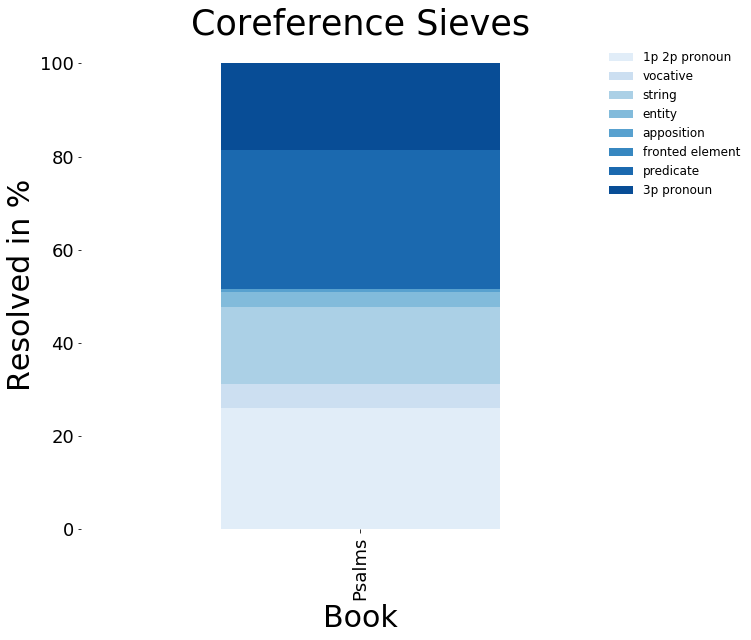

In [13]:
#sns.choose_colorbrewer_palette('sequential')

sieves = ('1p 2p pronoun', 'vocative', 'string', 'entity', 
          'apposition', 'fronted element', 'predicate', '3p pronoun'
         )

colours = sns.color_palette("Blues", n_colors=len(sieves))

df_total = sieve_total_df['total sieves']

df = sieve_total_df.drop(['total sieves', 'classes'], axis=1)
df = df.set_index('book')

res = round(df.div(df.sum(axis=1), axis=0)*100, 1)
res = res.reset_index()
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
res.plot(kind='bar', x='book', stacked=True, figsize=(10,9), color=colours)
plt.title(('Coreference Sieves'), fontsize=35)
plt.xlabel('Book', fontsize=30)
plt.ylabel('Resolved in %', fontsize=30)
plt.box(False)
plt.legend(frameon=False, fontsize=12, loc='best', bbox_to_anchor=(.7, .5, 0.5, 0.5))
plt.show()

In [14]:
res

,book,1p 2p pronoun,vocative,string,entity,apposition,fronted element,predicate,3p pronoun
0,Psalms,26.1,5.1,16.6,3.2,0.5,0.2,29.7,18.6


In [25]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_opt_ps', sieve_total_df, indx = False)

In [17]:
coref_stats_df

,chapter,input corefs,resolved,unresolved,%resolved,%unresolved,classes
0,Psalms_001,43,21,22,48.8,51.2,9
1,Psalms_002,87,44,43,50.6,49.4,15
2,Psalms_003,66,38,28,57.6,42.4,8
3,Psalms_004,75,37,38,49.3,50.7,10
4,Psalms_005,112,65,47,58.0,42.0,12
5,Psalms_006,84,50,34,59.5,40.5,11
6,Psalms_007,142,77,65,54.2,45.8,14
7,Psalms_008,62,24,38,38.7,61.3,6
8,Psalms_009,160,88,72,55.0,45.0,33
9,Psalms_010,150,87,63,58.0,42.0,26


In [18]:
ExportToLatex(OUTPUT_LOC, 'coref_stats_opt_ps_all', coref_stats_df, indx = False)

In [19]:
sieve_stats_df

,chapter,1p 2p pronoun,vocative,string,entity,apposition,fronted element,predicate,3p pronoun,total sieves,classes
0,Psalms_001,0,0,4,0,0,0,10,7,21,9
1,Psalms_002,7,2,3,1,1,0,16,14,44,15
2,Psalms_003,14,5,2,3,0,0,10,4,38,8
3,Psalms_004,7,4,1,3,0,0,17,5,37,10
4,Psalms_005,24,8,2,1,0,0,17,13,65,12
5,Psalms_006,23,5,1,3,0,0,17,1,50,11
6,Psalms_007,19,8,6,2,0,0,26,16,77,14
7,Psalms_008,7,5,4,0,0,0,2,6,24,6
8,Psalms_009,14,3,18,6,0,0,36,11,88,33
9,Psalms_010,5,4,17,2,0,0,37,22,87,26


In [20]:
ExportToLatex(OUTPUT_LOC, 'sieve_stats_opt_ps_all', sieve_stats_df, indx = False)